## Overview Machine Learning

<figure>
   <img src="./images/0train-cv-testset.png"  alt='missing' width="300"  >
   <img src="./images/0scale.png"  alt='missing' width="300"  >
   <img src="./images/0fitting.png"  alt='missing' width="300"  >
   <img src="./images/0loss.png"  alt='missing' width="300"  >
   <img src="./images/0Classification-Regression.png"  alt='missing' width="300"  >

<figure/>

In [1]:
#import libraries
import pandas as pd # type: ignore
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
import sklearn # type: ignore


# 1. Preprocessing 1: What is standardization and how to use it?

<figure>
   <img src="./images/1.png"  alt='missing' width="300"  >
   <img src="./images/1a.png"  alt='missing' width="300"  >
   <img src="./images/1b.png"  alt='missing' width="300"  >
   <img src="./images/1c.png"  alt='missing' width="300"  >

<figure/>

In [2]:
from sklearn import preprocessing # type: ignore

#data
x = np.array([ [100000, 150000, 350000, 200000], [1,2,3,2] ])
x = x.T

x_standardized = preprocessing.scale(x)
x_standardized

array([[-1.06904497, -1.41421356],
       [-0.53452248,  0.        ],
       [ 1.60356745,  1.41421356],
       [ 0.        ,  0.        ]])

In [3]:
# fit and transform
X_train = x

scaler = preprocessing.StandardScaler().fit(X_train)
# scaler.mean_
# scaler.var_

X_train_std = scaler.transform(X_train)
X_train_std


array([[-1.06904497, -1.41421356],
       [-0.53452248,  0.        ],
       [ 1.60356745,  1.41421356],
       [ 0.        ,  0.        ]])

# 2. Preprocessing 2: Scaling to range MinMaxScaler(), MaxAbsScaler()

<figure>
   <img src="./images/2.png"  alt='missing' width="300"  >
   <img src="./images/2a.png"  alt='missing' width="300"  >
   <img src="./images/2b.png"  alt='missing' width="300"  >
   <img src="./images/2c.png"  alt='missing' width="300"  >
   <img src="./images/2d.png"  alt='missing' width="300"  >
<figure/>

In [4]:
# MinMaxScaler

x_train = np.array([ [1,2],[3,4] ])
x_test = np.array([ [1,3],[4,2] ])

scaler = preprocessing.MinMaxScaler().fit(x_train)
# scaler.data_min_
# scaler.data_max_

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test) # lấy x của x_test, nhưng x_min x_max sẽ là của x_train tại .fit(x_train) 


In [5]:
# Another

preprocessing.minmax_scale(x_train)

array([[0., 0.],
       [1., 1.]])

In [6]:
# MaxAbsScaler

x_train = np.array([ [-100,-200], [3,4] ])

x_test = np.array([ [-90,-150],[4,3] ])

scaler = preprocessing.MaxAbsScaler().fit(x_train)
#scaler.max_abs_
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [7]:
# Another
preprocessing.maxabs_scale(x_train)

array([[-1.  , -1.  ],
       [ 0.03,  0.02]])

# 3. Preprocessing 3: Scaling a sparse matrix, CSR, CSC format


<figure>
   <img src="./images/3.png"  alt='missing' width="300"  >
   <img src="./images/3a.png"  alt='missing' width="300"  >
   <img src="./images/3b.png"  alt='missing' width="300"  >
   <img src="./images/3c.png"  alt='missing' width="300"  >
<figure/>

In [8]:
x_train = np.array([[1,0,0],
                    [0,5,6],
                    [7,0,0] ])

In [9]:
from scipy import sparse # type: ignore

x_train_csr = sparse.csr_matrix(x_train)
print(x_train_csr)

x_train_csc = sparse.csc_matrix(x_train)
print(x_train_csc)


<Compressed Sparse Row sparse matrix of dtype 'int32'
	with 4 stored elements and shape (3, 3)>
  Coords	Values
  (0, 0)	1
  (1, 1)	5
  (1, 2)	6
  (2, 0)	7
<Compressed Sparse Column sparse matrix of dtype 'int32'
	with 4 stored elements and shape (3, 3)>
  Coords	Values
  (0, 0)	1
  (2, 0)	7
  (1, 1)	5
  (1, 2)	6


In [10]:
#MaxAbsScale
scaler = preprocessing.MaxAbsScaler().fit(x_train_csr) #CSR

x_train_scaled = scaler.transform(x_train_csr)
print(x_train_scaled)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 4 stored elements and shape (3, 3)>
  Coords	Values
  (0, 0)	0.14285714285714285
  (1, 1)	1.0
  (1, 2)	1.0
  (2, 0)	1.0


In [11]:
#MaxAbsScale
scaler = preprocessing.MaxAbsScaler().fit(x_train_csc) #CSC

x_train_scaled = scaler.transform(x_train_csc)
print(x_train_scaled)

<Compressed Sparse Column sparse matrix of dtype 'float64'
	with 4 stored elements and shape (3, 3)>
  Coords	Values
  (0, 0)	0.14285714285714285
  (2, 0)	1.0
  (1, 1)	1.0
  (1, 2)	1.0


In [12]:
#StandardScaler
scaler = preprocessing.StandardScaler(with_mean=False).fit(x_train)
x_train_scaled = scaler.transform(x_train)
print(x_train_scaled)


[[0.32349832 0.         0.        ]
 [0.         2.12132034 2.12132034]
 [2.26448824 0.         0.        ]]


In [13]:
scaler = preprocessing.StandardScaler(with_mean=False).fit(x_train_csc) #CSC
x_train_scaled = scaler.transform(x_train_csc)
print(x_train_scaled)


<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 4 stored elements and shape (3, 3)>
  Coords	Values
  (0, 0)	0.3234983196103152
  (1, 1)	2.121320343559643
  (1, 2)	2.1213203435596424
  (2, 0)	2.2644882372722064


In [14]:
scaler = preprocessing.StandardScaler(with_mean=False).fit(x_train_csr) #CSR 
x_train_scaled = scaler.transform(x_train_csr)
print(x_train_scaled)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 4 stored elements and shape (3, 3)>
  Coords	Values
  (0, 0)	0.3234983196103152
  (1, 1)	2.121320343559643
  (1, 2)	2.1213203435596424
  (2, 0)	2.2644882372722064


# 4. Preprocessing 4: Scaling data with outliers using RobustScaler


<figure>
   <img src="./images/4.png"  alt='missing' width="300"  >
   <img src="./images/4a.png"  alt='missing' width="300"  >
<figure/>

In [15]:
x = np.array([[1,2,3],
              [4,5,6],
              [3,6,8],
              [7,999,999]])

scaler = preprocessing.RobustScaler().fit(x)
x_scaled = scaler.transform(x)
print(x_scaled.round(2))


[[-1.11 -0.01 -0.02]
 [ 0.22 -0.   -0.  ]
 [-0.22  0.    0.  ]
 [ 1.56  3.97  3.96]]


In [16]:
scaler = preprocessing.StandardScaler().fit(x)
x_scaled = scaler.transform(x)
print(x_scaled.round(2))

[[-1.27 -0.58 -0.58]
 [ 0.12 -0.58 -0.58]
 [-0.35 -0.57 -0.57]
 [ 1.5   1.73  1.73]]


In [17]:
scaler = preprocessing.MinMaxScaler().fit(x)
x_scaled = scaler.transform(x)
print(x_scaled.round(2))

[[0.   0.   0.  ]
 [0.5  0.   0.  ]
 [0.33 0.   0.01]
 [1.   1.   1.  ]]


In [18]:
scaler = preprocessing.MaxAbsScaler().fit(x)
x_scaled = scaler.transform(x)
print(x_scaled.round(2))

[[0.14 0.   0.  ]
 [0.57 0.01 0.01]
 [0.43 0.01 0.01]
 [1.   1.   1.  ]]


In [19]:
x = np.array([np.random.randint(0,10,50),
              np.random.randint(0,10,50)]).T
x = np.append(x, np.array([[5,999]]), axis=0)
preprocessing.RobustScaler().fit_transform(x).round(2)

array([[-5.5000e-01,  0.0000e+00],
       [ 5.5000e-01, -2.2000e-01],
       [ 3.6000e-01,  2.2000e-01],
       [-7.3000e-01,  4.4000e-01],
       [ 5.5000e-01,  2.2000e-01],
       [ 3.6000e-01, -4.4000e-01],
       [ 5.5000e-01,  4.4000e-01],
       [-5.5000e-01, -8.9000e-01],
       [ 0.0000e+00, -1.3300e+00],
       [ 0.0000e+00,  2.2000e-01],
       [ 0.0000e+00, -2.2000e-01],
       [-9.1000e-01, -8.9000e-01],
       [-3.6000e-01,  0.0000e+00],
       [ 1.8000e-01,  2.2000e-01],
       [-1.8000e-01,  2.2000e-01],
       [ 1.8000e-01,  2.2000e-01],
       [ 3.6000e-01,  0.0000e+00],
       [-7.3000e-01, -1.1100e+00],
       [-7.3000e-01, -8.9000e-01],
       [-9.1000e-01, -6.7000e-01],
       [-1.8000e-01, -1.3300e+00],
       [-7.3000e-01,  0.0000e+00],
       [-7.3000e-01, -4.4000e-01],
       [ 7.3000e-01,  2.2000e-01],
       [-5.5000e-01,  0.0000e+00],
       [-9.1000e-01, -8.9000e-01],
       [ 1.8000e-01,  2.2000e-01],
       [-7.3000e-01, -6.7000e-01],
       [ 7.3000e-01,

# 5. Preprocessing 5: Centering Kernel matrix

<figure>
   <img src="./images/5.png"  alt='missing' width="300"  >
   <img src="./images/5a.png"  alt='missing' width="300"  >
<figure/>

In [20]:
x = np.array([[1,2,3],
              [3,2,1],
              [2,1,3]])

In [21]:
scaler = preprocessing.KernelCenterer().fit(x)
# scaler.K_fit_rows
# scaler.K_fit_all
x_centered = scaler.transform(x)
print(x_centered)

[[-1.          0.33333333  0.66666667]
 [ 1.          0.33333333 -1.33333333]
 [ 0.         -0.66666667  0.66666667]]


In [22]:
np.mean(x_centered, axis=0).round(2)

array([ 0., -0., -0.])

# 6. Preprocessing 6: Intuition for Whitening or sphering a data set
<figure>
   <img src="./images/6.png"  alt='missing' width="300"  >
   <img src="./images/6a.png"  alt='missing' width="300"  >
   <img src="./images/6b.png"  alt='missing' width="300"  >
   <img src="./images/6c.png"  alt='missing' width="300"  >
   <img src="./images/6cc.png"  alt='missing' width="300"  >
   <img src="./images/6d.png"  alt='missing' width="300"  >
   <img src="./images/6e.png"  alt='missing' width="300"  >
   <img src="./images/6ee.png"  alt='missing' width="300"  >
   <img src="./images/6f.png"  alt='missing' width="300"  >
   <img src="./images/6g.png"  alt='missing' width="300"  >
   <img src="./images/6gg.png"  alt='missing' width="300"  >
   <img src="./images/6h.png"  alt='missing' width="300"  >
   <img src="./images/6hh.png"  alt='missing' width="600"  >
   <img src="./images/6i.png"  alt='missing' width="300"  >
<figure/>

In [23]:
from scipy import linalg # type: ignore

x = np.array([[1,2,3,4,5],
     [11,12,13,14,15]]) #one row  is one feature

xc = x.T - np.mean(x.T, axis=0) # x centered
xc = xc.T

xcov = np.cov(xc, rowvar=True, bias=True)

w,v = linalg.eig(xcov) #w: eigenvalues;    v: eigenvectors


e = 10**(-6) # e = .1e-5
diagw = np.diag(1/(w+e)**0.5) # Thêm e để tránh việc w = 0

xrot = np.dot(v,xc)
wpca = np.dot(np.dot(diagw,v.T),xc)
wzca = np.dot(np.dot(np.dot(v,diagw),v.T),xc)

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\collections.py:197: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


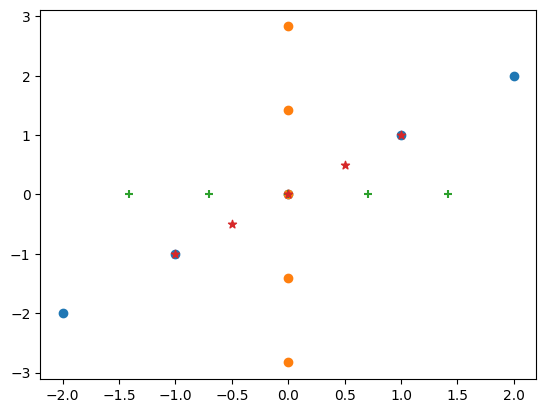

In [24]:
plt.scatter(xc[0,:],xc[1,:], label='centered')
plt.scatter(xrot[0,:],xrot[1,:], label='rotated')
plt.scatter(wpca[0,:],wpca[1,:],marker='+', label='wpca')
plt.scatter(wzca[0,:],wzca[1,:],marker='*', label='wzca')

In [25]:
np.random.seed(1)
mu = [0,0]
sigma = [[6,5],[5,6]]
n = 1000
x = np.random.multivariate_normal(mu,sigma,size=n)
print(x.shape)

(1000, 2)


In [26]:
xc = x -np.mean(x,axis=0)
xc=xc.T

xcov = np.cov(xc, rowvar=True, bias=True)

w,v = linalg.eig(xcov) #w: eigenvalues;    v: eigenvectors
e = 10**(-6) # e = .1e-5
diagw = np.diag(1/(w+e)**0.5) # Thêm e để tránh việc w = 0

wpca = np.dot(np.dot(diagw,v.T),xc)
wzca = np.dot(np.dot(np.dot(v,diagw),v.T),xc)



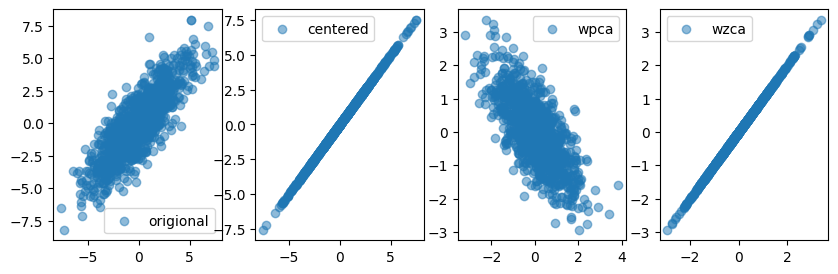

In [27]:
fig = plt.figure(figsize=(10,3))

plt.subplot(1,4,1)
plt.scatter(x[:,0],x[:,1], label='origional', alpha=0.5)
plt.legend()

plt.subplot(1,4,2)
plt.scatter(xc[0,:],xc[0,:], label='centered', alpha=0.5)
plt.legend()

plt.subplot(1,4,3)
plt.scatter(wpca[0,:],wzca[0,:], label='wpca', alpha=0.5)
plt.legend()

plt.subplot(1,4,4)
plt.scatter(wzca[0,:],wzca[0,:], label='wzca', alpha=0.5)
plt.legend()

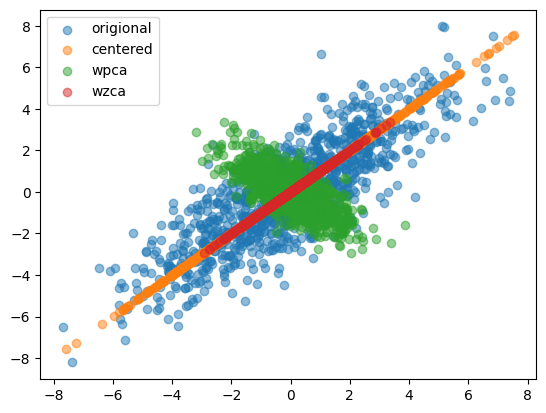

In [28]:
plt.scatter(x[:,0],x[:,1], label='origional', alpha=0.5)
plt.scatter(xc[0,:],xc[0,:], label='centered', alpha=0.5)
plt.scatter(wpca[0,:],wzca[0,:], label='wpca', alpha=0.5)
plt.scatter(wzca[0,:],wzca[0,:], label='wzca', alpha=0.5)
plt.legend()

# 7. Preprocessing 7: Intuition for Quantile Transform

<figure>
   <img src="./images/7.png"  alt='missing' width="300"  >
   <img src="./images/7a.png"  alt='missing' width="300"  >
   <img src="./images/7b.png"  alt='missing' width="300"  >
   <img src="./images/7c.png"  alt='missing' width="300"  >
   <img src="./images/7d.png"  alt='missing' width="300"  >
   <img src="./images/7e.png"  alt='missing' width="300"  >
   <img src="./images/7f.png"  alt='missing' width="300"  >
   <img src="./images/7g.png"  alt='missing' width="300"  >
   <img src="./images/7h.png"  alt='missing' width="300"  >
   <img src="./images/7i.png"  alt='missing' width="300"  >
   <img src="./images/7j.png"  alt='missing' width="300"  >
   <img src="./images/7k.png"  alt='missing' width="300"  >
   <img src="./images/7l.png"  alt='missing' width="300"  >
   <img src="./images/7m.png"  alt='missing' width="300"  >
   <img src="./images/7o.png"  alt='missing' width="300"  >
   <img src="./images/7n.png"  alt='missing' width="300"  >

<figure/>

In [29]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [30]:
#data
m1 = np.array([2,2,3,2,1,2,3,2,1,2,3,4,2,1,3,2]).reshape(16,1)
m2 = np.array([20,22,32,22,12,22,33,21,15,27,33,41,29,19,31,26]).reshape(16,1)
m3 = np.array([120,122,132,122,112,122,133,121,115,127,133,141,129,119,131,126]).reshape(16,1)

m = np.concatenate([m1,m2,m3],axis=1)

print(m.shape)

(16, 3)


Text(0.5, 1.0, 'origional data')

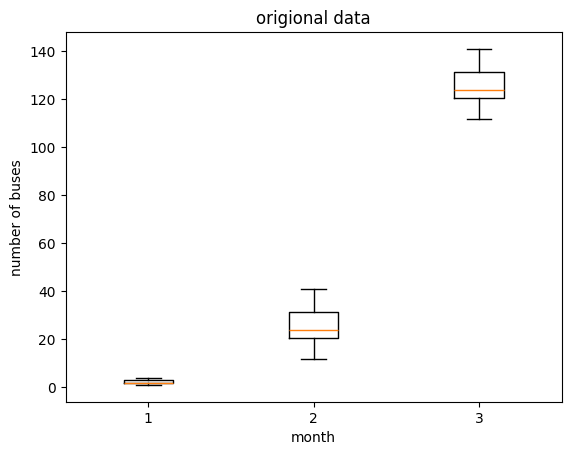

In [31]:
plt.boxplot(m)
plt.xlabel('month')
plt.ylabel('number of buses')
plt.title('origional data')

In [32]:
qt = preprocessing.QuantileTransformer(random_state=0)
m_trains = qt.fit_transform(m)

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_data.py:2785: UserWarning: n_quantiles (1000) is greater than the total number of samples (16). n_quantiles is set to n_samples.
  warnings.warn(


Text(0.5, 1.0, 'quantile transformed data')

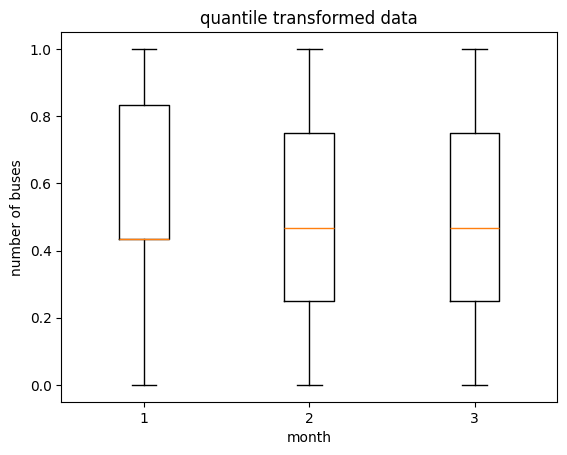

In [33]:
plt.boxplot(m_trains)
plt.xlabel('month')
plt.ylabel('number of buses')
plt.title('quantile transformed data')

In [34]:
#iris data
x, y = load_iris(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=0)

In [35]:
x_train_trans = qt.fit_transform(x_train)
x_test_trans = qt.transform(x_test)


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_data.py:2785: UserWarning: n_quantiles (1000) is greater than the total number of samples (112). n_quantiles is set to n_samples.
  warnings.warn(


(array([ 9., 23., 14., 27., 16., 26., 18.,  6.,  5.,  6.]),
 array([4.3 , 4.66, 5.02, 5.38, 5.74, 6.1 , 6.46, 6.82, 7.18, 7.54, 7.9 ]),
 <BarContainer object of 10 artists>)

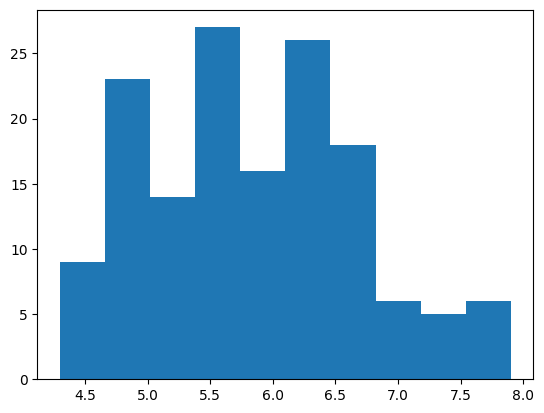

In [36]:
plt.hist(x[:,0])

(array([12., 11., 11.,  9., 11., 13., 10., 10., 13., 12.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

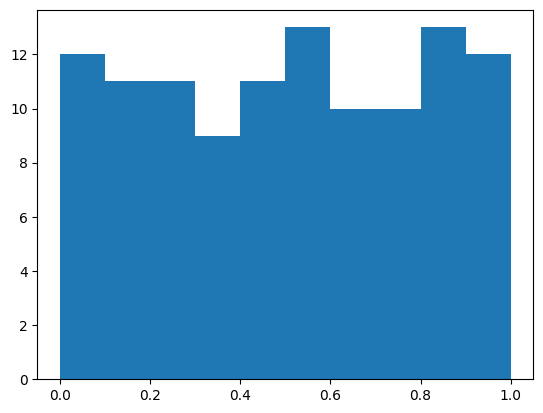

In [37]:
plt.hist(x_train_trans[:,0])

In [38]:
qt = preprocessing.QuantileTransformer(random_state=0, output_distribution='normal')
x_trains_normal = qt.fit_transform(x_train)

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_data.py:2785: UserWarning: n_quantiles (1000) is greater than the total number of samples (112). n_quantiles is set to n_samples.
  warnings.warn(


(array([ 1.,  0.,  2., 14., 37., 40., 17.,  0.,  0.,  1.]),
 array([-5.19933758e+00, -4.15947007e+00, -3.11960255e+00, -2.07973503e+00,
        -1.03986752e+00,  4.89217555e-11,  1.03986752e+00,  2.07973503e+00,
         3.11960255e+00,  4.15947007e+00,  5.19933758e+00]),
 <BarContainer object of 10 artists>)

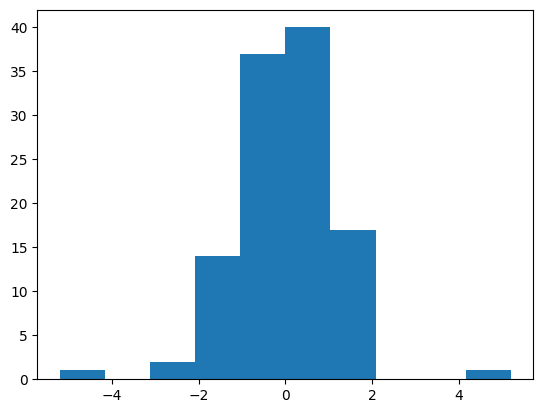

In [39]:
plt.hist(x_trains_normal[:,0])

# 9. Preprocessing 9: Intuition for Power Transform (non-linear transformation)

<figure>
   <img src="./images/9.png"  alt='missing' width="300"  >
   <img src="./images/9a.png"  alt='missing' width="300"  >
   <img src="./images/9b.png"  alt='missing' width="300"  >
   <img src="./images/9c.png"  alt='missing' width="300"  >
   <img src="./images/9cc.png"  alt='missing' width="300"  >
   <img src="./images/9d.png"  alt='missing' width="300"  >
   <img src="./images/9dd.png"  alt='missing' width="300"  >
   <img src="./images/9e.png"  alt='missing' width="300"  >

<figure/>

In [40]:
np.random.seed(0)

#origional data
mu, sigma = 4., 1.
logn = np.random.lognormal(mu,sigma,1000)


In [41]:
# 1: Yeo-Johnson    2: Box-Cox
t1,t2 = [], []
l1, l2 = -.09, -.04

for xi in logn:
    t1.append((((xi+1)**l1)-1)/l1)
    t2.append(((xi**l2)-1)/l2)

In [42]:
def plothis(a,a_title,b,c):
    fig = plt.figure(figsize=(15,4))
    
    plt.subplot(1,3,1)
    plt.hist(a)
    plt.title(a_title)
    
    plt.subplot(1,3,2)
    plt.hist(b)
    plt.title("Yeo-Johnson")
    
    plt.subplot(1,3,3)
    plt.hist(c)
    plt.title("Box-Cox")
    
    plt.tight_layout()
    plt.show()

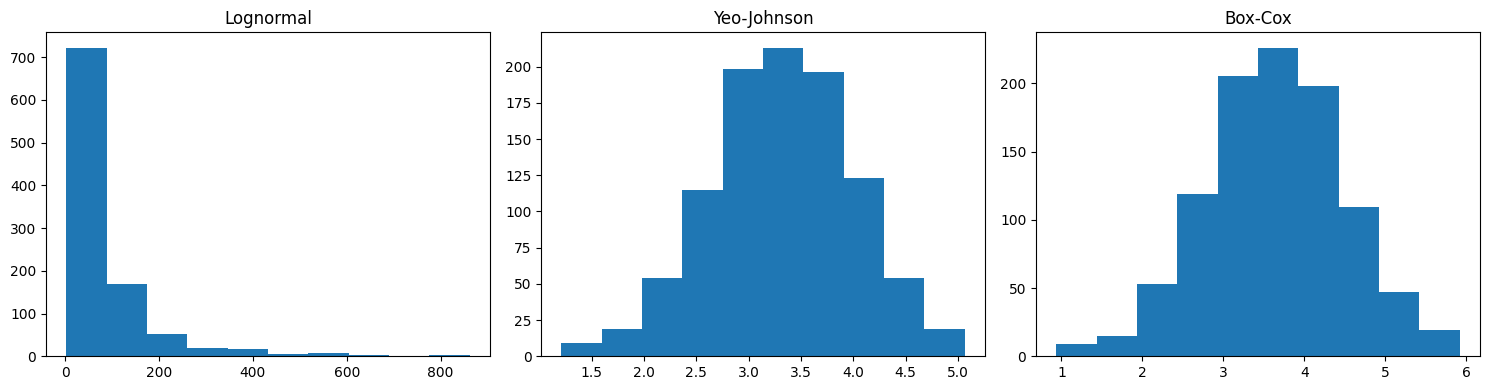

In [43]:
plothis(logn, "Lognormal", t1, t2)

In [44]:
train_yj = preprocessing.PowerTransformer(method='yeo-johnson', standardize=True)
train_bc = preprocessing.PowerTransformer(method='box-cox', standardize=True)

In [45]:
logn = logn.reshape(1000,1)

In [46]:
sk_log_yj = train_yj.fit_transform(logn)
sk_log_bc = train_bc.fit_transform(logn)

(array([  9.,  23.,  75., 140., 210., 236., 163.,  89.,  39.,  16.]),
 array([-2.96444506, -2.39207804, -1.81971102, -1.247344  , -0.67497698,
        -0.10260996,  0.46975706,  1.04212408,  1.6144911 ,  2.18685812,
         2.75922514]),
 <BarContainer object of 10 artists>)

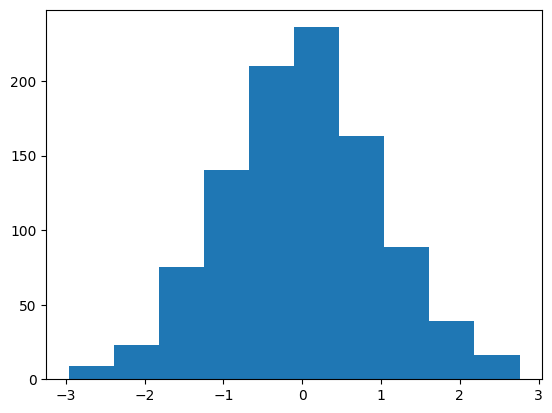

In [47]:
plt.hist(sk_log_yj)

(array([  9.,  20.,  64., 136., 217., 233., 176.,  90.,  39.,  16.]),
 array([-3.08860743, -2.49958886, -1.91057029, -1.32155172, -0.73253314,
        -0.14351457,  0.445504  ,  1.03452258,  1.62354115,  2.21255972,
         2.80157829]),
 <BarContainer object of 10 artists>)

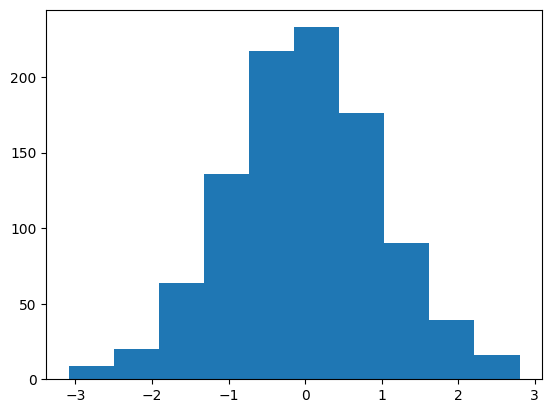

In [48]:
plt.hist(sk_log_bc)

In [49]:
def getvals(x,l1,l2):
    #transformed
    t1,t2 = [], []

    for xi in logn:
        t1.append((((xi+1)**l1)-1)/l1)
        t2.append(((xi**l2)-1)/l2)
        
    #normalize
    t1 = (t1 - np.mean(t1))/np.std(t1)
    t2 = (t1 - np.mean(t2))/np.std(t2)
    return (t1,t2)

In [50]:
def transfthis(x,x_title):
    train_yj = preprocessing.PowerTransformer(method='yeo-johnson', standardize=True)
    train_bc = preprocessing.PowerTransformer(method='box-cox', standardize=True)
    
    x = x.reshape(1000,1)
    
    sk_yj = train_yj.fit_transform(x)
    sk_bc = train_bc.fit_transform(x)
    
    plothis(x, x_title, sk_yj, sk_bc)

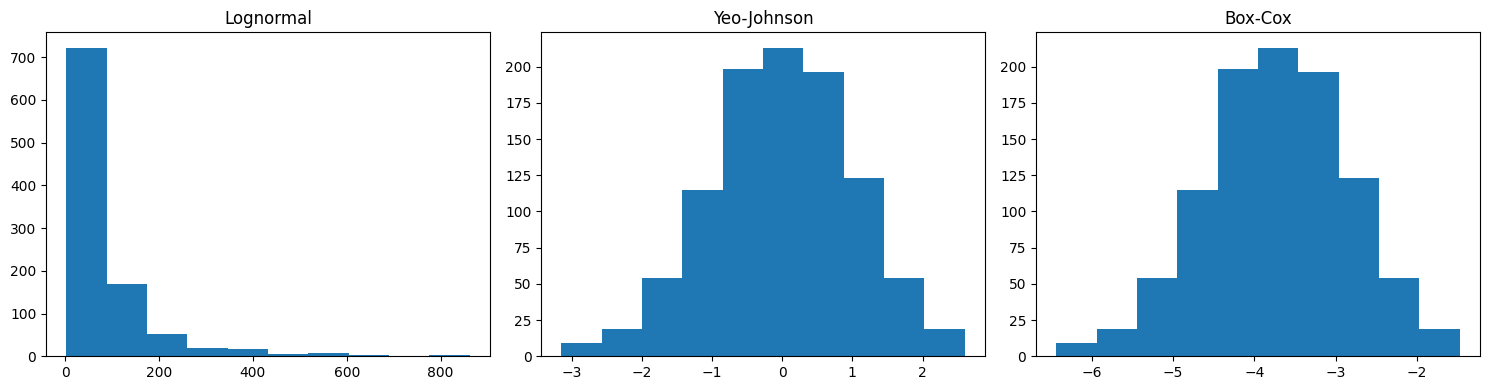

In [51]:
np.random.seed(0)
mu, sigma = 4., 1.
logn = np.random.lognormal(mu,sigma,1000)

t1,t2 = getvals(logn,-.09, .04)
plothis(logn, 'Lognormal', t1, t2)


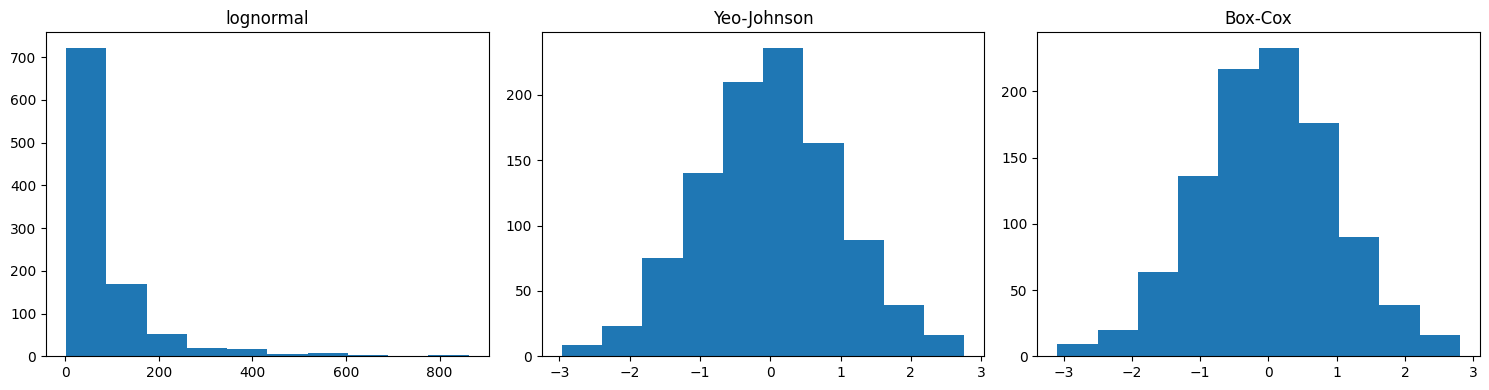

In [52]:
transfthis(logn, 'lognormal')

### Chisquare Distribution

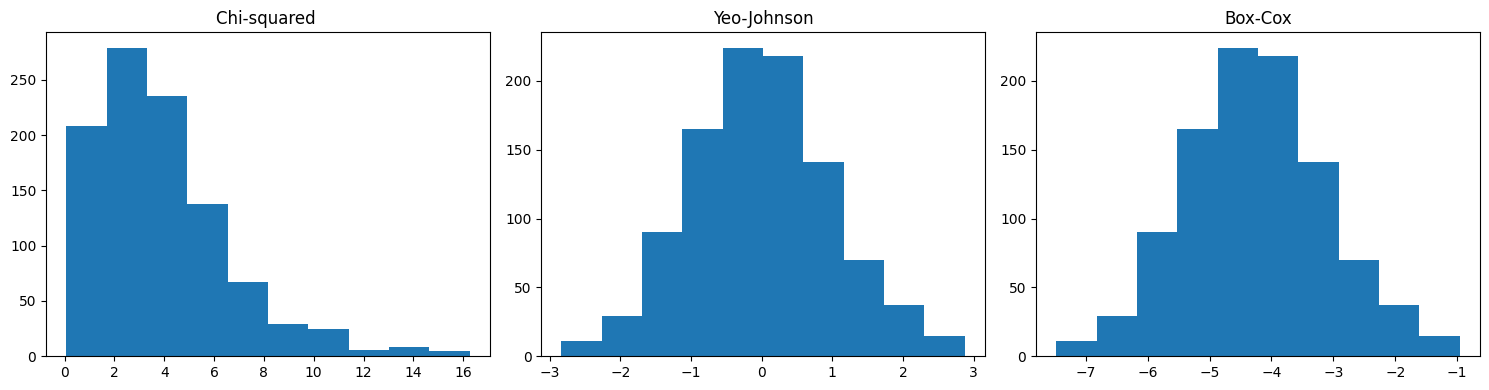

In [53]:
np.random.seed(0)

chidist = np.random.chisquare(df=4, size = 1000)

t1,t2 = getvals(chidist,-.005, -.03)
plothis(chidist, 'Chi-squared ', t1, t2)


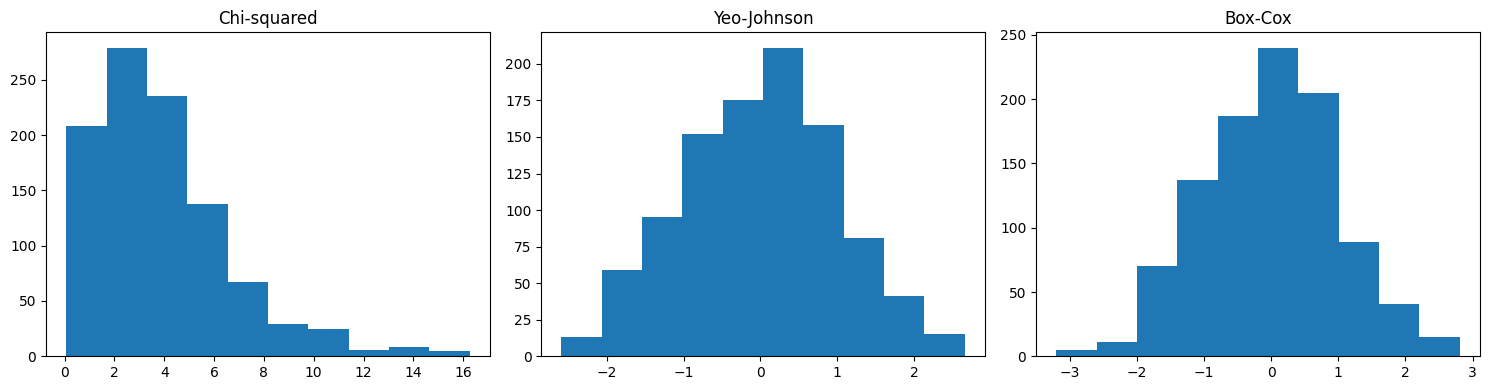

In [54]:
transfthis(chidist, 'Chi-squared')

### Weibull Distribution

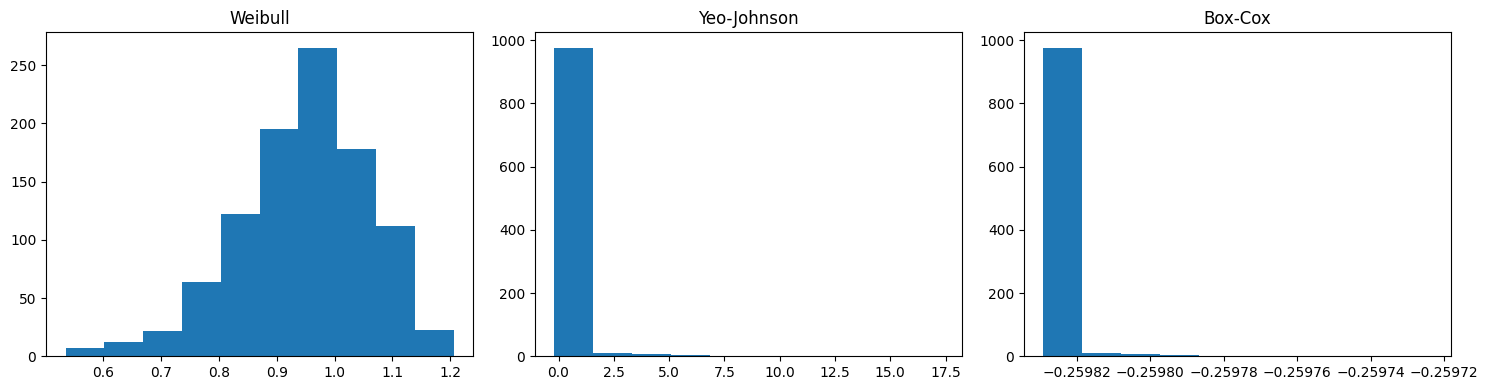

In [55]:
np.random.seed(2) 
wei = np.random.weibull(a=10,size=1000)
t1,t2 = getvals(wei,3,2.3)
plothis(wei,"Weibull",t1,t2)

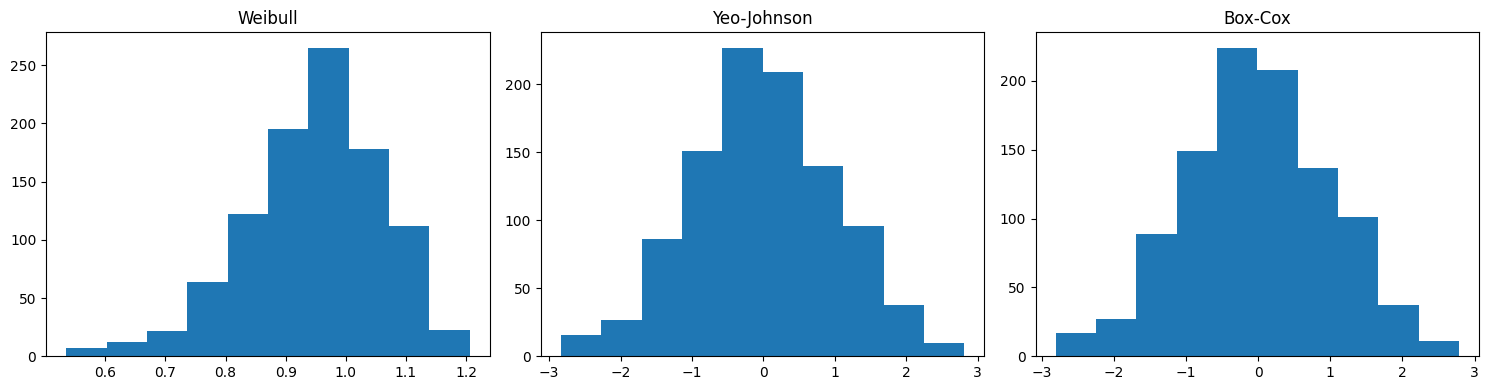

In [56]:
transfthis(wei,'Weibull')

### Gaussian Distribution

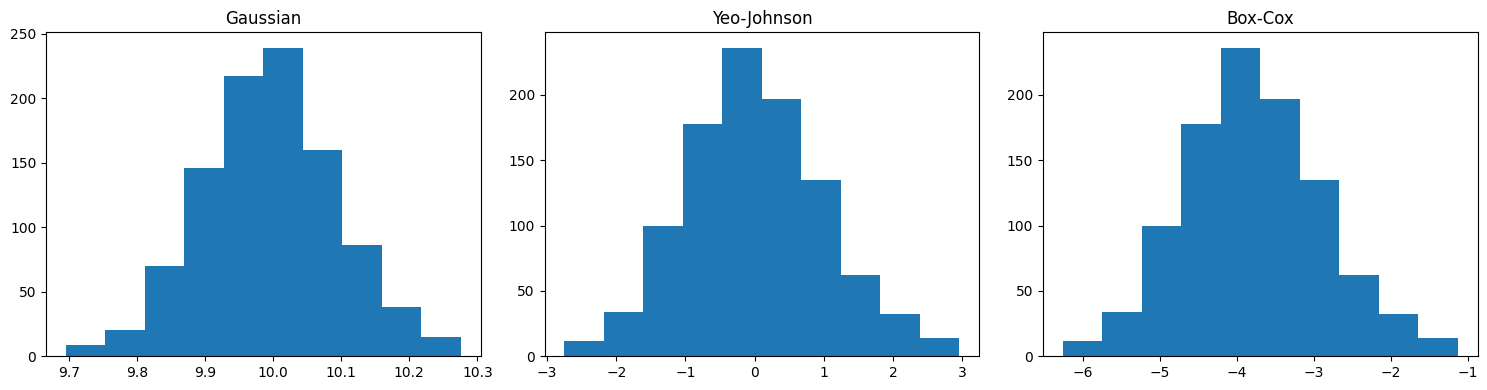

In [57]:
np.random.seed(0)
mu, sigma = 10, .1
gau = np.random.normal(mu,sigma, size = 1000)

t1, t2 = getvals(gau,0.02, 0.03)
plothis(gau,"Gaussian",t1,t2)

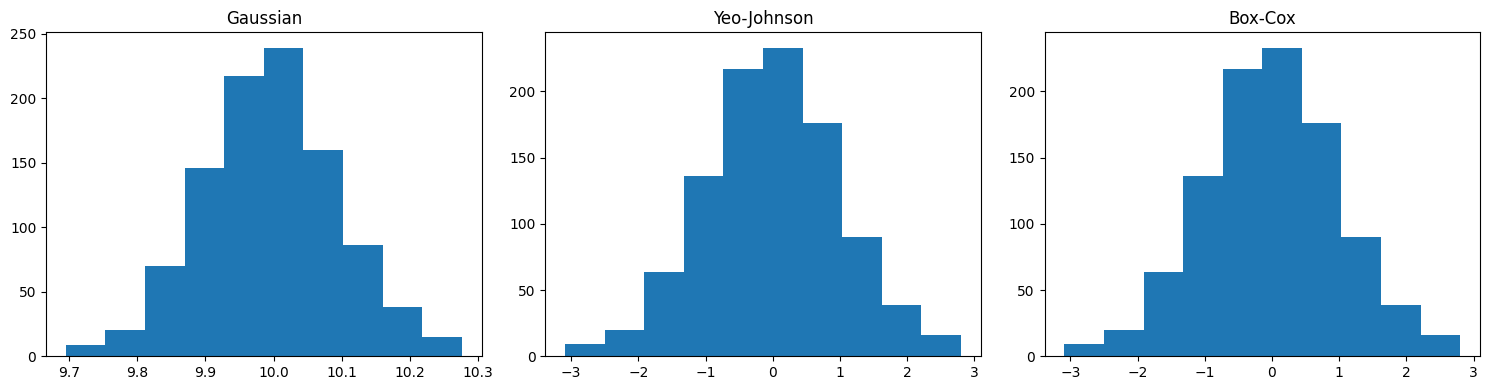

In [58]:
transfthis(gau,"Gaussian")

### Uniform Distribution

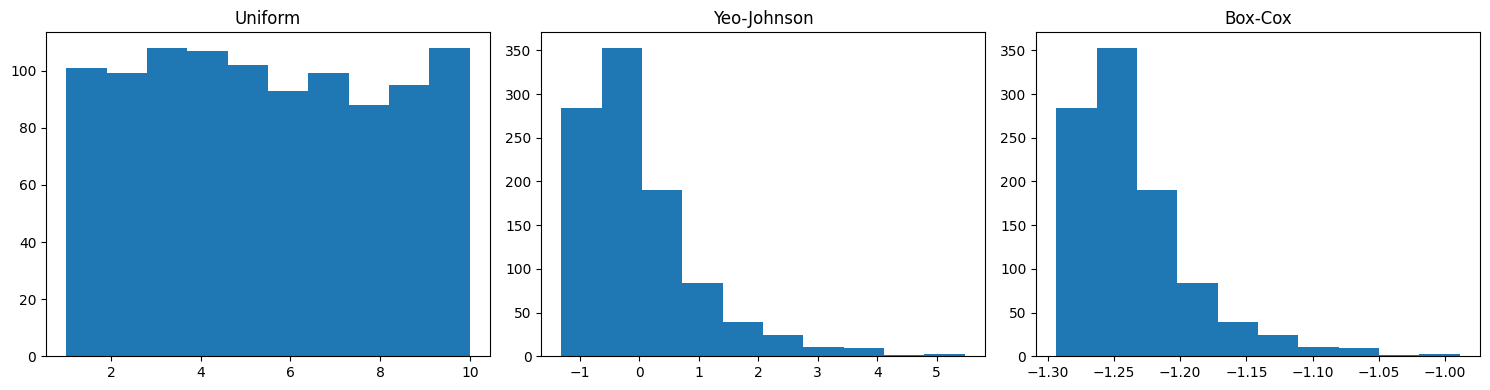

In [59]:
np.random.seed(0)
uni = np.random.uniform(low=1,high=10, size = 1000)

t1, t2 = getvals(uni,.6,.7)
plothis(uni,"Uniform",t1,t2)

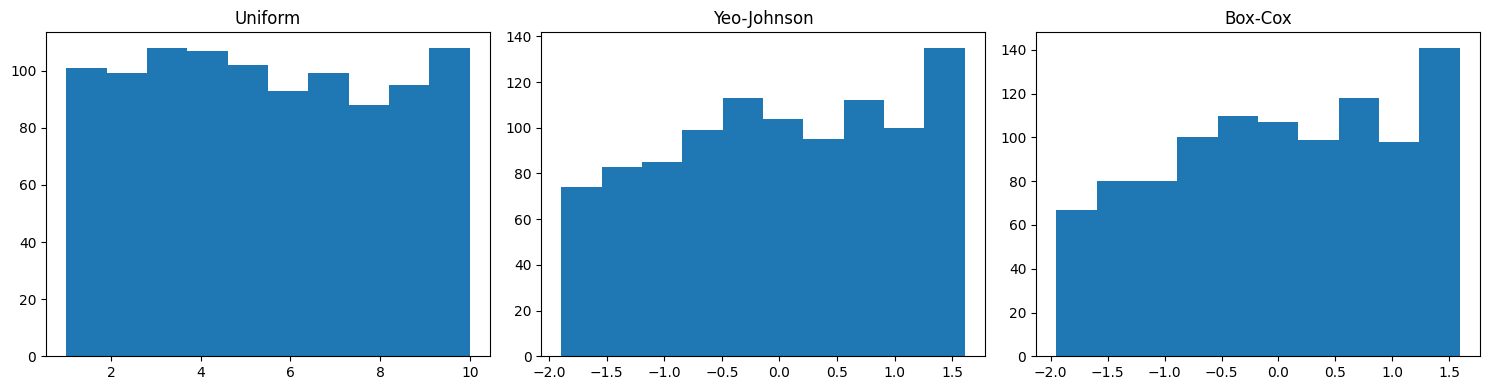

In [60]:
transfthis(uni,"Uniform")

### Bimodal Distribution

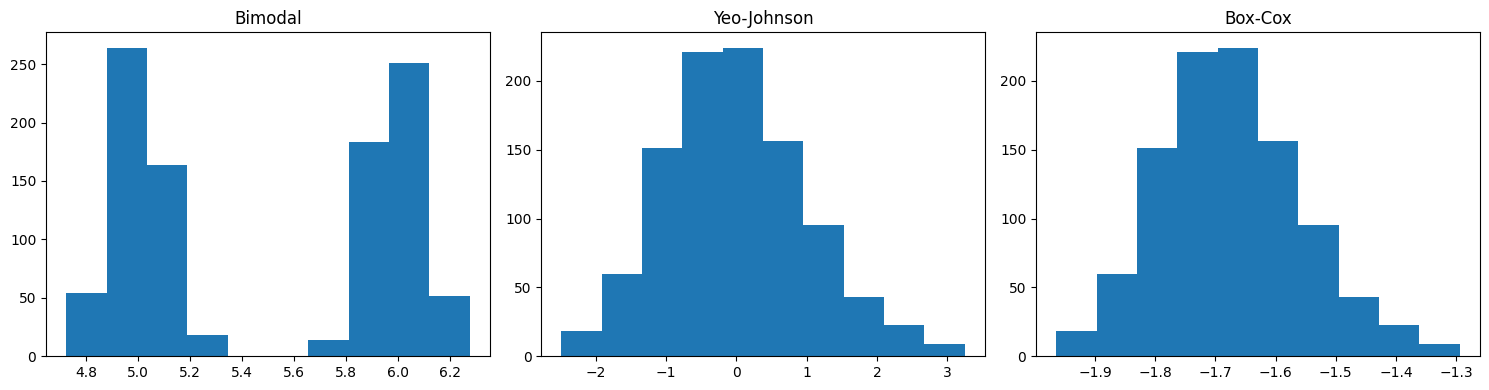

In [61]:
np.random.seed(0)
mu, sigma = 5, .1

m1 = np.random.normal(mu,sigma, size = 500)
m2 = np.random.normal(mu+1,sigma, size = 500)
bim = np.concatenate([m1,m2], axis=0)
t1, t2 = getvals(bim,.1,.5)
plothis(bim,"Bimodal",t1,t2)

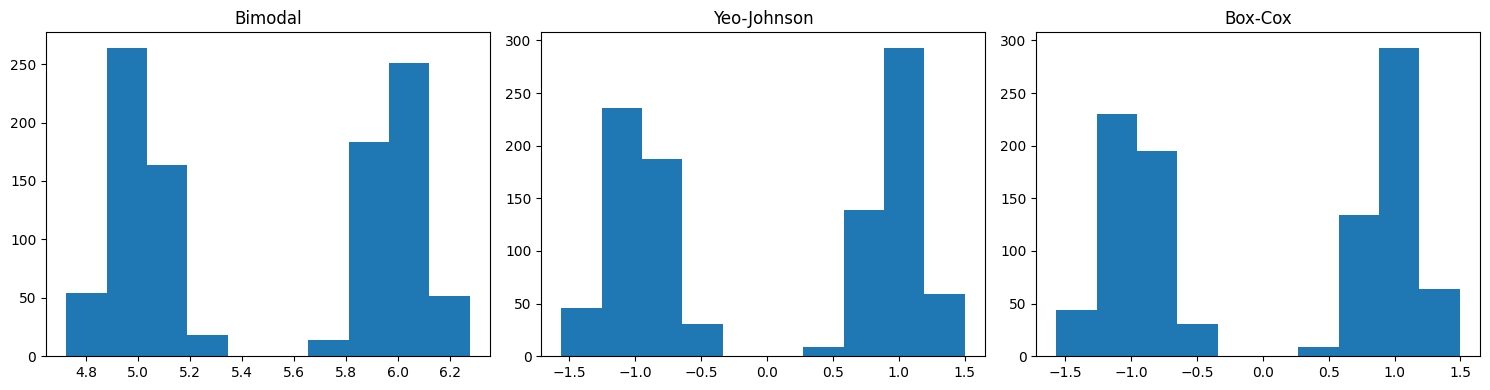

In [62]:
transfthis(bim,"Bimodal")

(array([  1.,   0.,  18., 131., 350., 350., 131.,  18.,   0.,   1.]),
 array([-5.19933758e+00, -4.15947007e+00, -3.11960255e+00, -2.07973503e+00,
        -1.03986752e+00,  4.89217555e-11,  1.03986752e+00,  2.07973503e+00,
         3.11960255e+00,  4.15947007e+00,  5.19933758e+00]),
 <BarContainer object of 10 artists>)

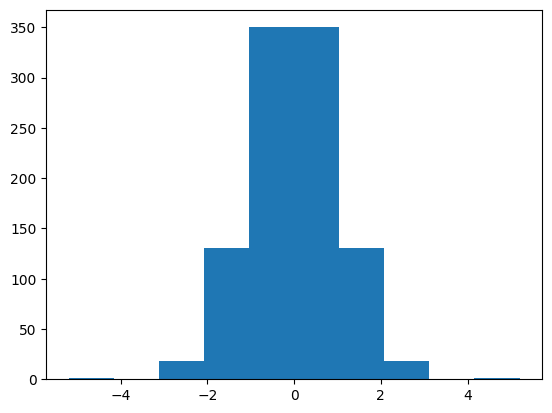

In [63]:
qt = preprocessing.QuantileTransformer(output_distribution='normal')
bim = bim.reshape(1000,1)
tranf = qt.fit_transform(bim)
plt.hist(tranf)

(array([  1.,   0.,  18., 131., 350., 350., 131.,  18.,   0.,   1.]),
 array([-5.19933758e+00, -4.15947007e+00, -3.11960255e+00, -2.07973503e+00,
        -1.03986752e+00,  4.89217555e-11,  1.03986752e+00,  2.07973503e+00,
         3.11960255e+00,  4.15947007e+00,  5.19933758e+00]),
 <BarContainer object of 10 artists>)

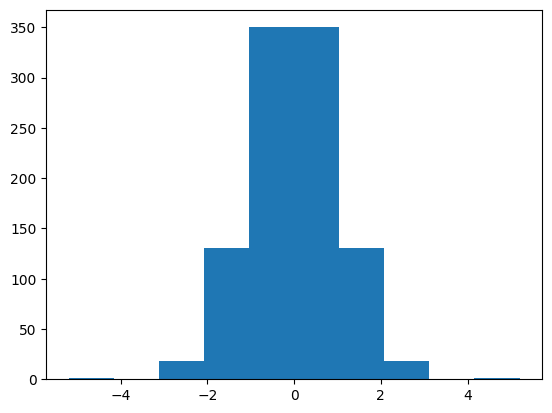

In [64]:
qt = preprocessing.QuantileTransformer(output_distribution='normal')
uni = uni.reshape(1000,1)
tranf = qt.fit_transform(uni)
plt.hist(tranf)


# 10. Preprocessing 10: Intuition for Normalization - L1, L2

<figure>
   <img src="./images/10.png"  alt='missing' width="300"  >
   <img src="./images/10a.png"  alt='missing' width="300"  >
   <img src="./images/10b.png"  alt='missing' width="300"  >
   <img src="./images/10c.png"  alt='missing' width="300"  >
   <img src="./images/10d.png"  alt='missing' width="300"  >
   <img src="./images/10e.png"  alt='missing' width="300"  >
   <img src="./images/10f.png"  alt='missing' width="300"  >
   <img src="./images/10g.png"  alt='missing' width="300"  >
   <img src="./images/10h.png"  alt='missing' width="300"  >
   <img src="./images/10i.png"  alt='missing' width="300"  >
   <img src="./images/10j.png"  alt='missing' width="300"  >
   <img src="./images/10k.png"  alt='missing' width="300"  >
   <img src="./images/10l.png"  alt='missing' width="300"  >
<figure/>


data = np.random.randint(low=0,high=100,size=(10,2))

normalized_data1 = preprocessing.normalize(data, norm='l2')

transformer = preprocessing.Normalizer(norm='l2')
normalized_data2 = transformer.fit_transform(data)

In [65]:
x = np.array([[1,30],[2,40],[3,50]])
x

array([[ 1, 30],
       [ 2, 40],
       [ 3, 50]])

In [66]:
#option 1
x_norm_l1 = preprocessing.normalize(x, norm='l1')
x_norm_l2 = preprocessing.normalize(x, norm='l2')
print(x_norm_l1)
print(x_norm_l2)

[[0.03225806 0.96774194]
 [0.04761905 0.95238095]
 [0.05660377 0.94339623]]
[[0.03331483 0.99944491]
 [0.04993762 0.99875234]
 [0.05989229 0.99820485]]


In [67]:
x_norm_l1 = preprocessing.normalize(x, norm='l1', axis=0)
print(x_norm_l1)

x_norm_l1 = preprocessing.normalize(x, norm='l1', axis=1)
print(x_norm_l1)


[[0.16666667 0.25      ]
 [0.33333333 0.33333333]
 [0.5        0.41666667]]
[[0.03225806 0.96774194]
 [0.04761905 0.95238095]
 [0.05660377 0.94339623]]


In [68]:
#option 2
transformer = preprocessing.Normalizer(norm='l1')
x_norm_l1 = transformer.fit_transform(x)
transformer = preprocessing.Normalizer(norm='l2')
x_norm_l2 = transformer.fit_transform(x)
print(x_norm_l1)
print(x_norm_l2)

[[0.03225806 0.96774194]
 [0.04761905 0.95238095]
 [0.05660377 0.94339623]]
[[0.03331483 0.99944491]
 [0.04993762 0.99875234]
 [0.05989229 0.99820485]]


# 12. Preprocessing 12: Categorical: OrdinalEncoder, OneHotEncoder

<figure>
   <img src="./images/12.png"  alt='missing' width="500"  >
   <img src="./images/12a.png"  alt='missing' width="500"  >
   <img src="./images/12b.png"  alt='missing' width="500"  >
   <img src="./images/12c.png"  alt='missing' width="500"  >
<figure/>

In [69]:
#data
game = [
    ['first', 'gold', 'top'],
    ['second', 'silver', 'middle'],
    ['third', 'bronze', 'bottom']
]


x = [
    ['football', 'helmet', 'ground'],
    ['basketball', 'shoes', 'net'],
    ['cricket', 'bat', 'pitch'],
    ['tennis', 'band', 'court']
]

h = [
    ['male', 'truck', 'blue'],
    ['female', 'car', 'green'],
    ['male', 'bike', 'gray']
]

plants = [
    {'fruit': 'pear', 'weight': 178.},
    {'fruit': 'pomegranate', 'weight': 250.},
    {'fruit': 'cherry', 'weight': 5.}
]

### OrdinalEncoder()

In [70]:
#auto
#game
enc = preprocessing.OrdinalEncoder(categories='auto')
enc.fit(game)

OrdinalEncoder()

In [71]:
enc.categories_

[array(['first', 'second', 'third'], dtype=object),
 array(['bronze', 'gold', 'silver'], dtype=object),
 array(['bottom', 'middle', 'top'], dtype=object)]

In [72]:
enc.transform([['second', 'silver', 'bottom'],
               ['first', 'bronze','top']])

array([[1., 2., 0.],
       [0., 0., 2.]])

In [73]:
#categories
winner = ['first', 'second', 'third']
medal = ['gold', 'silver','bronze']
ranks = ['top','middle','bottom']

In [74]:
enc = preprocessing.OrdinalEncoder(categories=[winner,medal,ranks])
enc.fit(game)
enc.categories_

[array(['first', 'second', 'third'], dtype=object),
 array(['gold', 'silver', 'bronze'], dtype=object),
 array(['top', 'middle', 'bottom'], dtype=object)]

In [75]:
enc.transform([['second', 'silver', 'bottom'],
               ['first', 'bronze','top']])

array([[1., 1., 2.],
       [0., 2., 0.]])

### OneHotEncoder

In [76]:
x

[['football', 'helmet', 'ground'],
 ['basketball', 'shoes', 'net'],
 ['cricket', 'bat', 'pitch'],
 ['tennis', 'band', 'court']]

In [77]:
#1
enc = preprocessing.OneHotEncoder()
enc.fit(x)
enc.categories_

[array(['basketball', 'cricket', 'football', 'tennis'], dtype=object),
 array(['band', 'bat', 'helmet', 'shoes'], dtype=object),
 array(['court', 'ground', 'net', 'pitch'], dtype=object)]

In [78]:
enc.transform([['football', 'bat', 'court'],
               ['cricket','shoes', 'net'],
               ['football', 'bat','net']]).toarray()

array([[0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0.]])

In [79]:
# 2
sport = ['basketball', 'cricket', 'football', 'tennis']
gear = ['band', 'bat', 'helmet', 'shoes']
location = ['court', 'ground', 'net', 'pitch']

enc = preprocessing.OneHotEncoder(categories=[sport,gear,location])
enc.fit(x)
enc.categories_

[array(['basketball', 'cricket', 'football', 'tennis'], dtype=object),
 array(['band', 'bat', 'helmet', 'shoes'], dtype=object),
 array(['court', 'ground', 'net', 'pitch'], dtype=object)]

In [80]:
enc.transform([['football', 'bat', 'court'],
               ['cricket','shoes', 'net'],
               ['football', 'bat','net']]).toarray()

array([[0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0.]])

In [81]:
#2b
enc = preprocessing.OneHotEncoder(handle_unknown='ignore') # cái ví dụ 'train' ở dưới k có trong tập dữ liệu, nếu k dùng cái handle_unknown sẽ bị báo lỗi
enc.fit(x)


OneHotEncoder(handle_unknown='ignore')

In [82]:
enc.transform([['football', 'bat', 'train'],
               ['cricket','bat', 'court']]).toarray()

array([[0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.]])

In [83]:
#3
h

[['male', 'truck', 'blue'],
 ['female', 'car', 'green'],
 ['male', 'bike', 'gray']]

In [84]:
drop_enc = preprocessing.OneHotEncoder(drop='if_binary')
drop_enc.fit(h)

OneHotEncoder(drop='if_binary')

In [85]:
drop_enc.categories_

[array(['female', 'male'], dtype=object),
 array(['bike', 'car', 'truck'], dtype=object),
 array(['blue', 'gray', 'green'], dtype=object)]

In [86]:
drop_enc.transform(h).toarray() # khi mà array chỉ có 2 cột thì nó trả về binary, ở đây male: 1 female: 0;  còn lại thì vẫn như cũ

array([[1., 0., 0., 1., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 1.],
       [1., 1., 0., 0., 0., 1., 0.]])

In [87]:
#4
from sklearn.feature_extraction import DictVectorizer

In [88]:
plants

[{'fruit': 'pear', 'weight': 178.0},
 {'fruit': 'pomegranate', 'weight': 250.0},
 {'fruit': 'cherry', 'weight': 5.0}]

In [89]:
vec = DictVectorizer()

In [90]:
vec.fit_transform(plants).toarray()

array([[  0.,   1.,   0., 178.],
       [  0.,   0.,   1., 250.],
       [  1.,   0.,   0.,   5.]])

In [91]:
vec.feature_names_

['fruit=cherry', 'fruit=pear', 'fruit=pomegranate', 'weight']

In [92]:
#matrix with det()=0 // định thức = 0
x = np.array([[1,23,10],
              [2,34,20],
              [3,56,30]])
x

array([[ 1, 23, 10],
       [ 2, 34, 20],
       [ 3, 56, 30]])

In [93]:
np.linalg.det(x).round(2)

0.0

# 13. Preprocessing 13: Intuition for Binning, KBinsDiscretizer
<figure>
    <img src="./images/13.png"  alt='missing' width="300"  >
    <img src="./images/13a.png"  alt='missing' width="300"  >
    <img src="./images/13b.png"  alt='missing' width="300"  >
    <img src="./images/13c.png"  alt='missing' width="300"  >
    <img src="./images/13d.png"  alt='missing' width="300"  > 
</figure>

### n_bins=[n1,n2,...,nn]
n là số lượng feature,
ni là số lượng bin của mỗi feature

feature: cột - sample: hàng

In [94]:
#data
x = np.array([[1,2,3,4],
              [-1,-2,-3,-4],
              [4,3,2,1],
              [0,1,0,1]])

In [95]:
#ordinal
est = preprocessing.KBinsDiscretizer(n_bins=[4,3,2,2], encode='ordinal', strategy='uniform')
est.fit(x)
# est.n_bins
# est.bin_edges_

KBinsDiscretizer(encode='ordinal', n_bins=[4, 3, 2, 2], strategy='uniform')

In [96]:
est.bin_edges_

array([array([-1.  ,  0.25,  1.5 ,  2.75,  4.  ]),
       array([-2.        , -0.33333333,  1.33333333,  3.        ]),
       array([-3.,  0.,  3.]), array([-4.,  0.,  4.])], dtype=object)

In [97]:
x

array([[ 1,  2,  3,  4],
       [-1, -2, -3, -4],
       [ 4,  3,  2,  1],
       [ 0,  1,  0,  1]])

In [98]:
est.transform(x)

array([[1., 2., 1., 1.],
       [0., 0., 0., 0.],
       [3., 2., 1., 1.],
       [0., 1., 1., 1.]])

x và transform(x) nhìn theo cột, giá trị của trans là cái index bin: 
ví dụ bin_edge_[0] là [-1.  ,  0.25,  1.5 ,  2.75,  4.  ] 
        0: [-1. , 0.25)
        1: [0.25 , 1.5)
        2: [1.5 , 2.75)
        3: [2.75 , 4.]
x nhìn theo cột [0] là [1,-1,4,0]
transform(x) nhìn theo cột [0] là [1,0,3,0]. 
Với x = 1 thì transform(x) = 1 vì x nằm trong [0.25 , 1.5) 
Với x = -1 thì transform(x) = 0 vì x nằm trong [-1. , 0.25)
Với x = 4 thì transform(x) = 3 vì x nằm trong [2.75 , 4.]
Với x = 0 thì transform(x) = 0 vì x nằm trong [0.25 , 1.5) 

In [99]:
#onehot
est = preprocessing.KBinsDiscretizer(n_bins=[4,3,2,2], encode='onehot', strategy='uniform')
est.fit(x)

KBinsDiscretizer(n_bins=[4, 3, 2, 2], strategy='uniform')

In [100]:
est.bin_edges_

array([array([-1.  ,  0.25,  1.5 ,  2.75,  4.  ]),
       array([-2.        , -0.33333333,  1.33333333,  3.        ]),
       array([-3.,  0.,  3.]), array([-4.,  0.,  4.])], dtype=object)

In [101]:
est.transform(x).toarray()

array([[0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1.],
       [1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.],
       [1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1.]])

In [102]:
x

array([[ 1,  2,  3,  4],
       [-1, -2, -3, -4],
       [ 4,  3,  2,  1],
       [ 0,  1,  0,  1]])

x và trans nhìn cột như cũ, edges 
vì có 4 + 3 + 2 + 2 = 11 bin nên trans có 11 cột. 4 cột đầu là feature 1, 3 cột tiếp là feature 2 ... 2-3 3-4
ví dụ.  
x = 1: 4 cột đầu của trans[0] = 0, 1, 0, 0
bin ở index 1 được bật lên: ứng với đoạn [0.25 , 1.5)


In [103]:
# onehot vs quantile
est = preprocessing.KBinsDiscretizer(n_bins=[4,3,2,2], encode='onehot', strategy='quantile')
est.fit(x)

KBinsDiscretizer(n_bins=[4, 3, 2, 2])

In [104]:
est.bin_edges_

array([array([-1.  , -0.25,  0.5 ,  1.75,  4.  ]),
       array([-2.,  1.,  2.,  3.]), array([-3.,  1.,  3.]),
       array([-4.,  1.,  4.])], dtype=object)

In [105]:
est.transform(x).toarray()

array([[0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1.],
       [1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.],
       [0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1.]])

In [106]:
x

array([[ 1,  2,  3,  4],
       [-1, -2, -3, -4],
       [ 4,  3,  2,  1],
       [ 0,  1,  0,  1]])

In [107]:
#kmeans
est = preprocessing.KBinsDiscretizer(n_bins=[4,3,2,2], encode='onehot', strategy='kmeans')
est.fit(x)
est.transform(x).toarray()

array([[0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1.],
       [1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.],
       [0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1.]])

In [108]:
est.bin_edges_

array([array([-1. , -0.5,  0.5,  2.5,  4. ]),
       array([-2.  , -0.5 ,  1.75,  3.  ]), array([-3. ,  0.5,  3. ]),
       array([-4., -1.,  4.])], dtype=object)

In [109]:
x

array([[ 1,  2,  3,  4],
       [-1, -2, -3, -4],
       [ 4,  3,  2,  1],
       [ 0,  1,  0,  1]])

# 16. Preprocessing 16: Binarize(), Binarizer()

In [110]:
x= np.array([[ 1,  2,  3,  4],
             [-1, -2, -3, -4],
             [ 4,  3,  2,  1],
             [ 0,  1,  0,  1]])

### binary --> 0,1

In [111]:
# threshold 0.0
b = preprocessing.Binarizer(threshold=0.0) # giá trị lớn hơn 0.0 thì trans ra 1, <= 0.0 thì ra 0
b.fit(x)

Binarizer()

In [112]:
b.transform(x)

array([[1, 1, 1, 1],
       [0, 0, 0, 0],
       [1, 1, 1, 1],
       [0, 1, 0, 1]])

In [113]:
# threshold 0.5
b = preprocessing.Binarizer(threshold=0.5) 
b.fit(x)

Binarizer(threshold=0.5)

In [114]:
b.transform(x)

array([[1, 1, 1, 1],
       [0, 0, 0, 0],
       [1, 1, 1, 1],
       [0, 1, 0, 1]])

In [115]:
#ohter
preprocessing.binarize(x, threshold=3.)

array([[0, 0, 0, 1],
       [0, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 0]])

# 17. Preprocessing 17: Univariate feature imputation:
<figure>
    <img src="./images/17.png"  alt='missing' width="300"  >
    <img src="./images/17a.png"  alt='missing' width="300"  > 
    <img src="./images/17b.png"  alt='missing' width="300"  > 
    <img src="./images/17c.png"  alt='missing' width="300"  > 
    <img src="./images/17d.png"  alt='missing' width="300"  > 
    <img src="./images/17e.png"  alt='missing' width="300"  > 
    <img src="./images/17f.png"  alt='missing' width="300"  > 
</figure>

In [116]:
from sklearn.impute import SimpleImputer
import scipy.sparse as sp

In [117]:
x= np.array([[1,2],
            [np.nan,2],
            [5,np.nan]])
x

array([[ 1.,  2.],
       [nan,  2.],
       [ 5., nan]])

In [118]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(x)

SimpleImputer()

In [119]:
imp.transform(x)

array([[1., 2.],
       [3., 2.],
       [5., 2.]])

In [120]:
m = np.array([[np.nan,8],
              [9, np.nan],
              [11,12]
              ])

In [121]:
imp.transform(m)

array([[ 3.,  8.],
       [ 9.,  2.],
       [11., 12.]])

## CSC 

In [122]:
x = np.array([[1,2],
              [0,-1],
              [4,8]])
x

array([[ 1,  2],
       [ 0, -1],
       [ 4,  8]])

In [123]:
np.mean(x,axis=0)

array([1.66666667, 3.        ])

In [124]:
xc = sp.csc_matrix(x)
print(xc)

<Compressed Sparse Column sparse matrix of dtype 'int32'
	with 5 stored elements and shape (3, 2)>
  Coords	Values
  (0, 0)	1
  (2, 0)	4
  (0, 1)	2
  (1, 1)	-1
  (2, 1)	8


In [125]:
imp = SimpleImputer(missing_values=-1, strategy='mean')
imp.fit(xc)

SimpleImputer(missing_values=-1)

In [126]:
m = np.array([[-1,2],
              [6,-1],
              [7,6]])

In [127]:
mc = sp.csc_matrix(m)
print(mc)

<Compressed Sparse Column sparse matrix of dtype 'int32'
	with 6 stored elements and shape (3, 2)>
  Coords	Values
  (0, 0)	-1
  (1, 0)	6
  (2, 0)	7
  (0, 1)	2
  (1, 1)	-1
  (2, 1)	6


In [128]:
imp.transform(mc).toarray()

array([[1.66666667, 2.        ],
       [6.        , 5.        ],
       [7.        , 6.        ]])

### DataFrame

In [129]:
df = pd.DataFrame([
    ['a','b'],
    [np.nan,'b'],
    ['a',np.nan],
    ['c','d']], dtype='category'
)
df

,0,1
0,a,b
1,NaN,b
2,a,NaN
3,c,d


In [130]:
imp = SimpleImputer(strategy='most_frequent')
imp.fit_transform(df)

array([['a', 'b'],
       ['a', 'b'],
       ['a', 'b'],
       ['c', 'd']], dtype=object)

# 18. Preprocessing 18: Multivariate imputation, IterativeImputer()

<figure>
    <img src="./images/18.png"  alt='missing' width="300"  >
    <img src="./images/18a.png"  alt='missing' width="300"  >
    <img src="./images/18b.png"  alt='missing' width="300"  >
    <img src="./images/18c.png"  alt='missing' width="300"  >
    <img src="./images/18d.png"  alt='missing' width="300"  >
    <img src="./images/18e.png"  alt='missing' width="300"  >
    <img src="./images/18f.png"  alt='missing' width="300"  >
</figure>

In [131]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor

In [132]:
x = np.array([
    [1.,2.],
    [3.,4.],
    [5.,6.],
    [np.nan,8.],
    [9.,np.nan]
])

In [133]:
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(x)

IterativeImputer(random_state=0)

In [134]:
m = np.array([
    [np.nan,2],
    [3,np.nan],
    [np.nan,6.],
    [7,8]
])

In [135]:
imp.transform(m).round(3)

array([[0.997, 2.   ],
       [3.   , 3.999],
       [5.004, 6.   ],
       [7.   , 8.   ]])

### estimators

In [136]:
imp = IterativeImputer(estimator=DecisionTreeRegressor(max_features='sqrt',random_state=0))
imp.fit(x)
imp.transform(m)

array([[1., 2.],
       [3., 4.],
       [5., 6.],
       [7., 8.]])

In [137]:
imp = IterativeImputer(estimator=ExtraTreesRegressor(n_estimators=10, random_state=0))
imp.fit(x)
imp.transform(m)

array([[1., 2.],
       [3., 4.],
       [5., 6.],
       [7., 8.]])

In [138]:
imp = IterativeImputer(estimator=KNeighborsRegressor(n_neighbors=2))
imp.fit(x)
imp.transform(m)

array([[2., 2.],
       [3., 3.],
       [7., 6.],
       [7., 8.]])

# 19. Preprocessing 19: Compare imputation techniques

In [139]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer, SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline


from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [140]:
x = np.array([
    [-1, 12, 1, 1, 1, 0],
    [-2, 13, 1, 2, 2, 1],
    [-3, 14, 1, 3, 4, 1],
    [-4, 1, 1, 4, 8, 2],
    [-5, 2, 2, 5, 16, 4],
    [-6, 3, 2, 6, 32, 8],
    [-7, 12, 2, 7, 64, 16],
    [-8, 13, 2, 8, 128, 32]
])
x

array([[ -1,  12,   1,   1,   1,   0],
       [ -2,  13,   1,   2,   2,   1],
       [ -3,  14,   1,   3,   4,   1],
       [ -4,   1,   1,   4,   8,   2],
       [ -5,   2,   2,   5,  16,   4],
       [ -6,   3,   2,   6,  32,   8],
       [ -7,  12,   2,   7,  64,  16],
       [ -8,  13,   2,   8, 128,  32]])

In [141]:
y = np.sum(x, axis=1)
y

array([ 14,  17,  20,  12,  24,  45,  94, 175])

In [142]:
x_missing = np.array([
    [-1, 12, 1, 1, 1, 0],
    [np.nan, 13, 1, 2, 2, 1],
    [-3, np.nan, 1, 3, 4, 1],
    [-4, 1, np.nan, 4, 8, 2],
    [-5, 2, 2, np.nan, np.nan, 4],
    [-6, 3, 2, 6, 32, 8],
    [-7, 12, 2, 7, 64, 16],
    [-8, 13, 2, 8, 128, np.nan]
])
x_missing

array([[ -1.,  12.,   1.,   1.,   1.,   0.],
       [ nan,  13.,   1.,   2.,   2.,   1.],
       [ -3.,  nan,   1.,   3.,   4.,   1.],
       [ -4.,   1.,  nan,   4.,   8.,   2.],
       [ -5.,   2.,   2.,  nan,  nan,   4.],
       [ -6.,   3.,   2.,   6.,  32.,   8.],
       [ -7.,  12.,   2.,   7.,  64.,  16.],
       [ -8.,  13.,   2.,   8., 128.,  nan]])

In [143]:
y_missing = y.copy()
y_missing

array([ 14,  17,  20,  12,  24,  45,  94, 175])

### MSE (mean squared erro)

In [144]:
from sklearn.metrics import mean_squared_error

In [145]:
y_true = [1, -1, 2, 5]
y_pred = [3, -2, 1, 6.5]

In [146]:
mean_squared_error(y_true, y_pred)

2.0625

### Regressors

In [147]:
N_SPLITS = 3
regressor = RandomForestRegressor(random_state=0)

In [148]:
mses = np.zeros(5)
stds = np.zeros(5)

# full_scores
full_scores = cross_val_score(regressor,x,y,scoring='neg_mean_squared_error', cv = N_SPLITS)

mses[0] = np.mean(full_scores)
stds[0] = np.std(full_scores)

In [149]:
#zero impute
imputer = SimpleImputer(missing_values=np.nan, add_indicator=True, strategy='constant', fill_value=0)

estimator = make_pipeline(imputer, regressor)

impute_score = cross_val_score(estimator, x_missing, y_missing, scoring='neg_mean_squared_error', cv=N_SPLITS)

mses[1] = np.mean(impute_score)
stds[1] = np.std(impute_score)

In [150]:
#KNN impute
imputer = KNNImputer(missing_values=np.nan, add_indicator=True)

estimator = make_pipeline(imputer, regressor)

impute_score = cross_val_score(estimator, x_missing, y_missing, scoring='neg_mean_squared_error', cv=N_SPLITS)

mses[2] = np.mean(impute_score)
stds[2] = np.std(impute_score)

In [151]:
mses

array([-4310.04485   , -4669.71041667, -4939.31042778,     0.        ,
           0.        ])

In [152]:
stds

array([4799.29529368, 5165.57272735, 4967.54380168,    0.        ,
          0.        ])

In [153]:
imputer.fit_transform(x_missing)

array([[ -1. ,  12. ,   1. ,   1. ,   1. ,   0. ,   0. ,   0. ,   0. ,
          0. ,   0. ,   0. ],
       [ -3.8,  13. ,   1. ,   2. ,   2. ,   1. ,   1. ,   0. ,   0. ,
          0. ,   0. ,   0. ],
       [ -3. ,   6.2,   1. ,   3. ,   4. ,   1. ,   0. ,   1. ,   0. ,
          0. ,   0. ,   0. ],
       [ -4. ,   1. ,   1.4,   4. ,   8. ,   2. ,   0. ,   0. ,   1. ,
          0. ,   0. ,   0. ],
       [ -5. ,   2. ,   2. ,   4.4,  34.6,   4. ,   0. ,   0. ,   0. ,
          1. ,   1. ,   0. ],
       [ -6. ,   3. ,   2. ,   6. ,  32. ,   8. ,   0. ,   0. ,   0. ,
          0. ,   0. ,   0. ],
       [ -7. ,  12. ,   2. ,   7. ,  64. ,  16. ,   0. ,   0. ,   0. ,
          0. ,   0. ,   0. ],
       [ -8. ,  13. ,   2. ,   8. , 128. ,   6. ,   0. ,   0. ,   0. ,
          0. ,   0. ,   1. ]])

In [154]:
#impute mean
imputer = SimpleImputer(missing_values=np.nan, strategy='mean' ,add_indicator=True)

estimator = make_pipeline(imputer, regressor)

impute_score = cross_val_score(estimator, x_missing, y_missing, scoring='neg_mean_squared_error', cv=N_SPLITS)

mses[3] = np.mean(impute_score)
stds[3] = np.std(impute_score)

In [155]:
#Iterative Imputer
imputer = IterativeImputer(missing_values=np.nan,add_indicator=True, random_state=0, n_nearest_features=5, sample_posterior=True)

estimator = make_pipeline(imputer, regressor)

impute_score = cross_val_score(estimator, x_missing, y_missing, scoring='neg_mean_squared_error', cv=N_SPLITS)

mses[4] = np.mean(impute_score)
stds[4] = np.std(impute_score)

In [156]:
estimator

Pipeline(steps=[('iterativeimputer',
                 IterativeImputer(add_indicator=True, n_nearest_features=5,
                                  random_state=0, sample_posterior=True)),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=0))])

In [157]:
mses = mses * -1

In [158]:
import matplotlib.pyplot as plt

<BarContainer object of 5 artists>

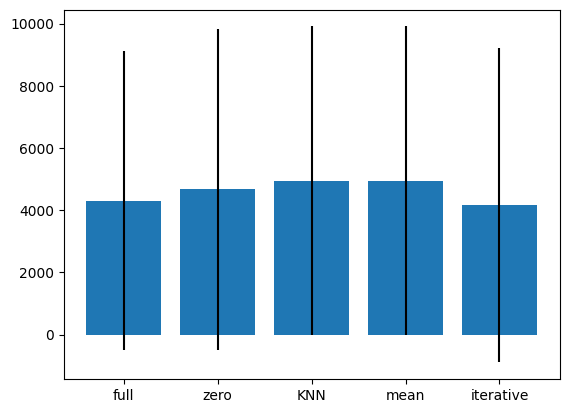

In [159]:
label = ['full', 'zero', 'KNN','mean','iterative']
plt.bar(label, mses, yerr=stds)

add_indicator=True : có 6 cột thì shape sẽ thêm 6 cột nữa, đánh dấu index ô dữ liệu bị missing

In [160]:
x_missing

array([[ -1.,  12.,   1.,   1.,   1.,   0.],
       [ nan,  13.,   1.,   2.,   2.,   1.],
       [ -3.,  nan,   1.,   3.,   4.,   1.],
       [ -4.,   1.,  nan,   4.,   8.,   2.],
       [ -5.,   2.,   2.,  nan,  nan,   4.],
       [ -6.,   3.,   2.,   6.,  32.,   8.],
       [ -7.,  12.,   2.,   7.,  64.,  16.],
       [ -8.,  13.,   2.,   8., 128.,  nan]])

In [161]:
#zero impute
imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)
t = imputer.fit_transform(x_missing)
print(t)

[[ -1.  12.   1.   1.   1.   0.]
 [  0.  13.   1.   2.   2.   1.]
 [ -3.   0.   1.   3.   4.   1.]
 [ -4.   1.   0.   4.   8.   2.]
 [ -5.   2.   2.   0.   0.   4.]
 [ -6.   3.   2.   6.  32.   8.]
 [ -7.  12.   2.   7.  64.  16.]
 [ -8.  13.   2.   8. 128.   0.]]


In [162]:
#impute mean
imputer = SimpleImputer(missing_values=np.nan, strategy='mean' )
t = imputer.fit_transform(x_missing)
print(t.round(2))

[[ -1.    12.     1.     1.     1.     0.  ]
 [ -4.86  13.     1.     2.     2.     1.  ]
 [ -3.     8.     1.     3.     4.     1.  ]
 [ -4.     1.     1.57   4.     8.     2.  ]
 [ -5.     2.     2.     4.43  34.14   4.  ]
 [ -6.     3.     2.     6.    32.     8.  ]
 [ -7.    12.     2.     7.    64.    16.  ]
 [ -8.    13.     2.     8.   128.     4.57]]


In [163]:
#KNN impute
imputer = KNNImputer(missing_values=np.nan)
t = imputer.fit_transform(x_missing)
print(t.round(2))

[[ -1.   12.    1.    1.    1.    0. ]
 [ -3.8  13.    1.    2.    2.    1. ]
 [ -3.    6.2   1.    3.    4.    1. ]
 [ -4.    1.    1.4   4.    8.    2. ]
 [ -5.    2.    2.    4.4  34.6   4. ]
 [ -6.    3.    2.    6.   32.    8. ]
 [ -7.   12.    2.    7.   64.   16. ]
 [ -8.   13.    2.    8.  128.    6. ]]


In [164]:
#Iterative Imputer
imputer = IterativeImputer(missing_values=np.nan, random_state=0, n_nearest_features=5, sample_posterior=True)
t = imputer.fit_transform(x_missing)
print(t.round(2))


[[ -1.    12.     1.     1.     1.     0.  ]
 [ -2.08  13.     1.     2.     2.     1.  ]
 [ -3.     4.56   1.     3.     4.     1.  ]
 [ -4.     1.     1.43   4.     8.     2.  ]
 [ -5.     2.     2.     4.73  15.41   4.  ]
 [ -6.     3.     2.     6.    32.     8.  ]
 [ -7.    12.     2.     7.    64.    16.  ]
 [ -8.    13.     2.     8.   128.    29.05]]


# 20. Preprocessing 20: Marking imputed values, MissingIndicator()

<figure>
    <img src="./images/20.png"  alt='missing' width="300"  >
    <img src="./images/20a.png"  alt='missing' width="300"  >
</figure>

In [165]:
from sklearn.impute import MissingIndicator
from sklearn.impute import KNNImputer
from sklearn.pipeline import FeatureUnion, make_pipeline
from sklearn.tree import DecisionTreeRegressor


In [166]:
#original data
x = np.array([[1,2,3,4],
              [-1,6,7,8],
              [9,-1,-1,12]])
x

array([[ 1,  2,  3,  4],
       [-1,  6,  7,  8],
       [ 9, -1, -1, 12]])

In [167]:
### missing only

ind = MissingIndicator(missing_values=-1, features='missing-only')
mask = ind.fit_transform(x)
mask

array([[False, False, False],
       [ True, False, False],
       [False,  True,  True]])

In [168]:
### all

ind = MissingIndicator(missing_values=-1, features='all')
mask = ind.fit_transform(x)
mask

array([[False, False, False, False],
       [ True, False, False, False],
       [False,  True,  True, False]])

In [169]:
ind.features_

array([0, 1, 2, 3])

### FeatureUnion

In [170]:
x_train = np.array([[1,2,3,4],
              [np.nan,6,7,8],
              [9,np.nan,np.nan,12],
              [13,14,15,16]])
x_train

array([[ 1.,  2.,  3.,  4.],
       [nan,  6.,  7.,  8.],
       [ 9., nan, nan, 12.],
       [13., 14., 15., 16.]])

In [171]:
y_train = np.array([10,26,42, 58])

In [172]:
transformer = FeatureUnion(
    transformer_list=[
        ('features', KNNImputer(n_neighbors=2,weights='uniform')),
        ('indicators', MissingIndicator())
    ]
)

In [173]:
t = transformer.fit(x_train)
t.transform(x_train)

array([[ 1.,  2.,  3.,  4.,  0.,  0.,  0.],
       [ 5.,  6.,  7.,  8.,  1.,  0.,  0.],
       [ 9., 10., 11., 12.,  0.,  1.,  1.],
       [13., 14., 15., 16.,  0.,  0.,  0.]])

In [174]:
model = make_pipeline(
    transformer, 
    DecisionTreeRegressor()
)
model = model.fit(x_train, y_train)
results = model.predict(x_train)
results # = y_train

array([10., 26., 42., 58.])

# 21. Preprocessing 21: Polynomial features
<figure>
    <img src="./images/21.png"  alt='missing' width="300"  >
    <img src="./images/21a.png"  alt='missing' width="300"  >
    <img src="./images/21b.png"  alt='missing' width="300"  >
    <img src="./images/21c.png"  alt='missing' width="300"  >
    <img src="./images/21d.png"  alt='missing' width="300"  >
    <img src="./images/21e.png"  alt='missing' width="300"  >
</figure>

In [175]:
from IPython.core.display import display, HTML
display(HTML("***style***.container { width:100% !important; }***/style***"))
np.set_printoptions(suppress=True)
np.set_printoptions(linewidth=200)

C:\Users\Admin\AppData\Local\Temp\ipykernel_22440\2602321655.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [176]:
x = np.array([[1,1,10],
              [2,2,11],
              [3,4,12],
              [4,6,14],
              [5,8,16]])
x

array([[ 1,  1, 10],
       [ 2,  2, 11],
       [ 3,  4, 12],
       [ 4,  6, 14],
       [ 5,  8, 16]])

In [177]:
# degree = 2
poly = preprocessing.PolynomialFeatures(2)
poly.fit_transform(x)

array([[  1.,   1.,   1.,  10.,   1.,   1.,  10.,   1.,  10., 100.],
       [  1.,   2.,   2.,  11.,   4.,   4.,  22.,   4.,  22., 121.],
       [  1.,   3.,   4.,  12.,   9.,  12.,  36.,  16.,  48., 144.],
       [  1.,   4.,   6.,  14.,  16.,  24.,  56.,  36.,  84., 196.],
       [  1.,   5.,   8.,  16.,  25.,  40.,  80.,  64., 128., 256.]])

In [178]:
# degree = 2
poly = preprocessing.PolynomialFeatures(degree=2, interaction_only=True) # cái cột tự chính nó bình phương sẽ không hiện ra
poly.fit_transform(x)

array([[  1.,   1.,   1.,  10.,   1.,  10.,  10.],
       [  1.,   2.,   2.,  11.,   4.,  22.,  22.],
       [  1.,   3.,   4.,  12.,  12.,  36.,  48.],
       [  1.,   4.,   6.,  14.,  24.,  56.,  84.],
       [  1.,   5.,   8.,  16.,  40.,  80., 128.]])

In [179]:
# degree = 2
poly = preprocessing.PolynomialFeatures(degree=3, interaction_only=True) # cái cột tự chính nó bình phương sẽ không hiện ra
poly.fit_transform(x)

array([[  1.,   1.,   1.,  10.,   1.,  10.,  10.,  10.],
       [  1.,   2.,   2.,  11.,   4.,  22.,  22.,  44.],
       [  1.,   3.,   4.,  12.,  12.,  36.,  48., 144.],
       [  1.,   4.,   6.,  14.,  24.,  56.,  84., 336.],
       [  1.,   5.,   8.,  16.,  40.,  80., 128., 640.]])

# 22. Preprocessing 22: Custom transformers FunctionalTransformer()
<figure>
    <img src="./images/22.png"  alt='missing' width="300"  >
</figure>

In [180]:
from sklearn.pipeline import Pipeline

In [181]:
x = np.array([[99,2,3],
              [4,5,6],
              [7,8,9]])
x

array([[99,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9]])

In [182]:
def squareit(x):
    return (x**2)

def loggit(x):
    return np.log(x)

def invit(x):
    return (1/x)

In [183]:
squareit_transformer = preprocessing.FunctionTransformer(squareit)
loggit_transformer = preprocessing.FunctionTransformer(loggit)
invit_transformer = preprocessing.FunctionTransformer(invit)

In [184]:
pipeline = Pipeline([
    ('squarethis', squareit_transformer),
    ('logthis', loggit_transformer),
    ('invthis', invit_transformer)
])
pipeline.fit(x)

Pipeline(steps=[('squarethis',
                 FunctionTransformer(func=<function squareit at 0x0000017AC45E5800>)),
                ('logthis',
                 FunctionTransformer(func=<function loggit at 0x0000017AC45E5260>)),
                ('invthis',
                 FunctionTransformer(func=<function invit at 0x0000017AC45E58A0>))])

In [185]:
pipline.transform(x)

NameError: name 'pipline' is not defined

In [ ]:
pipeline.fit_transform(x)

array([[0.10881109, 0.72134752, 0.45511961],
       [0.36067376, 0.31066747, 0.27905531],
       [0.25694917, 0.24044917, 0.22755981]])

In [ ]:
x

array([[99,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9]])